In [2]:

import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
df= pd.read_csv("/content/weather_forecast.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [5]:
lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [6]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [7]:
x = df.drop(["Play"],axis=1)
y = df["Play"].values

In [8]:
x

,Outlook,Temperature,Humidity,Windy
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [9]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3, p = 1)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [12]:
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [13]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [14]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()

parameters = {
    'n_neighbors': [x for x in range(1,13,1)],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.43333333 0.43333333 0.43333333 0.43333333 0.46666667 0.43333333
 0.46666667 0.43333333 0.76666667 0.63333333 0.76666667 0.76666667
 0.63333333 0.63333333 0.73333333 0.63333333 0.63333333 0.63333333
 0.63333333 0.63333333 0.63333333 0.73333333 0.63333333 0.73333333
 0.53333333 0.73333333 0.53333333 0.53333333 0.53333333 0.63333333
 0.53333333 0.63333333        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


In [15]:
best_model

KNeighborsClassifier(n_neighbors=3, p=1)

In [16]:
clf1 = MultinomialNB(alpha=0.1)
clf2 = BernoulliNB(alpha=0.1)

In [17]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB(alpha=0.1)

In [18]:
pred1 = clf1.predict(x_test)
pred2 = clf2.predict(x_test)

In [19]:
cm1 = confusion_matrix(y_test,pred1)
cr1 = classification_report(y_test,pred1)

cm2 = confusion_matrix(y_test,pred2)
cr2 = classification_report(y_test,pred2)

In [20]:
print(cr1, cr2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# MultinomialNB
mnb_clf = MultinomialNB()

mnb_parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

mnb_grid_search = GridSearchCV(mnb_clf, mnb_parameters, n_jobs=-1)
mnb_grid_search.fit(x_train, y_train)

best_mnb_model = mnb_grid_search.best_estimator_

# BernoulliNB
bnb_clf = BernoulliNB()

bnb_parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

bnb_grid_search = GridSearchCV(bnb_clf, bnb_parameters, n_jobs=-1)
bnb_grid_search.fit(x_train, y_train)

best_bnb_model = bnb_grid_search.best_estimator_


mnb_accuracy = best_mnb_model.score(x_test, y_test)
bnb_accuracy = best_bnb_model.score(x_test, y_test)

print("MultinomialNB Accuracy:", mnb_accuracy)
print("BernoulliNB Accuracy:", bnb_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


MultinomialNB Accuracy: 0.3333333333333333
BernoulliNB Accuracy: 1.0


In [22]:
best_mnb_model

MultinomialNB(alpha=0.1)

In [23]:
best_bnb_model

BernoulliNB(alpha=0.1)

In [24]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.66666667 0.66666667 0.66666667 0.66666667 0.5       ]
Mean score: 0.6333333333333333


In [25]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [26]:
parameters = {
    'C': [x/100 for x in range(1,11,1)],
    'max_iter': [x for x in range(1,11,1)],
    'penalty': ['l1','l2']

}
svm_grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept

In [27]:
best_svm_model

LinearSVC(C=0.02, max_iter=2, random_state=42)

In [28]:
best_model1=LinearSVC(C=0.02, max_iter=2, random_state=42)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_model1, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.66666667 0.66666667 0.33333333 0.66666667 1.        ]
Mean score: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [30]:

y_pred = dec_tree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 0
Accuracy: 1.00


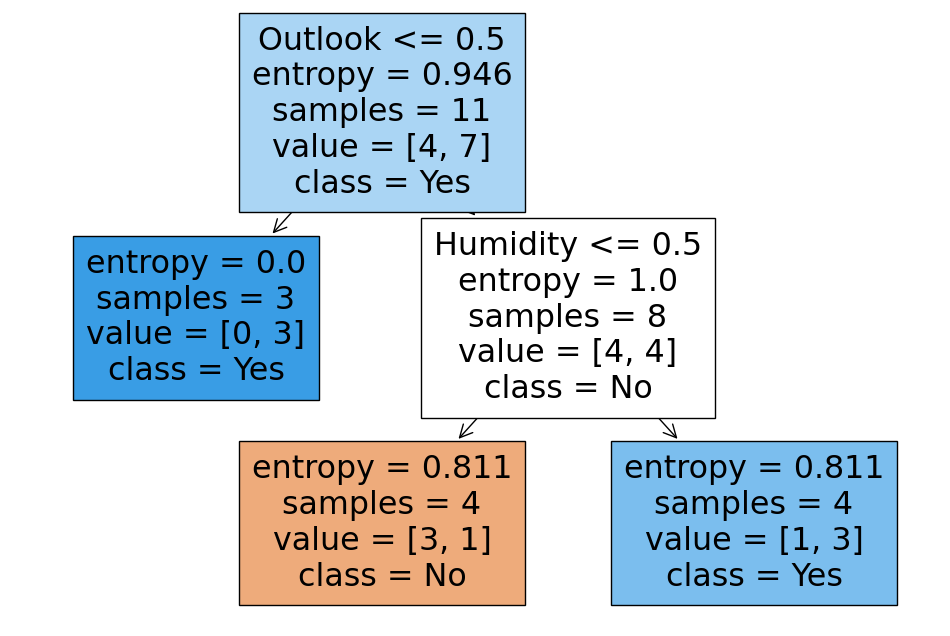

In [31]:
from sklearn import tree
clf.fit(x,y)
plt.figure(figsize=(12, 8))
tree.plot_tree(dec_tree, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [32]:
df2=pd.read_csv("/content/weatherassign.csv")

In [33]:
df2

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


In [34]:
df2.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [35]:
df2


,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-12,0.0,12.8,5.0,4.7,drizzle
1,02-01-12,10.9,10.6,2.8,4.5,rain
2,03-01-12,0.8,11.7,7.2,2.3,rain
3,04-01-12,20.3,12.2,5.6,4.7,rain
4,05-01-12,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-15,8.6,4.4,1.7,2.9,rain
1457,28-12-15,1.5,5.0,1.7,1.3,rain
1458,29-12-15,0.0,7.2,0.6,2.6,fog
1459,30-12-15,0.0,5.6,-1.0,3.4,sun


In [36]:
df2 = df2.drop(['date'],axis=1)


In [37]:
lb = LabelEncoder()
df2['weather'] = lb.fit_transform(df2['weather'])


In [38]:
x = df2.drop(['weather'],axis=1)
y = df2['weather'].values

In [39]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [40]:
y

array([0, 2, 2, ..., 1, 4, 4])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 4)
(1168,)
(293, 4)
(293,)


In [42]:
clf = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [43]:
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.33      0.08      0.13        25
           2       0.90      0.86      0.88       120
           3       0.00      0.00      0.00         8
           4       0.71      0.92      0.80       131

    accuracy                           0.77       293
   macro avg       0.45      0.39      0.39       293
weighted avg       0.72      0.77      0.73       293



In [45]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()

parameters = {
    'n_neighbors': [x for x in range(1,15,10)],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [46]:
best_model


KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [47]:
#clf = MultinomialNB()
clf = BernoulliNB(alpha=0.5)

In [48]:

clf.fit(x_train,y_train)

BernoulliNB(alpha=0.5)

In [49]:
pred = clf.predict(x_test)

In [50]:
cm1 = confusion_matrix(y_test,pred)
cr1 = classification_report(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(cr1, cr2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.93      0.93      0.93       120
           3       0.00      0.00      0.00         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.34      0.39      0.36       293
weighted avg       0.72      0.83      0.77       293
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [52]:
bnb_clf = BernoulliNB()

bnb_parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

bnb_grid_search1 = GridSearchCV(bnb_clf, bnb_parameters, n_jobs=-1)
bnb_grid_search1.fit(x_train, y_train)

best_bnb_model1 = bnb_grid_search1.best_estimator_



bnb_accuracy1 = best_bnb_model1.score(x_test, y_test)


print("BernoulliNB Accuracy:", bnb_accuracy1)

BernoulliNB Accuracy: 0.8293515358361775


In [53]:
best_bnb_model1



BernoulliNB(alpha=0.5)

In [54]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.90      0.93      0.91       120
           3       0.00      0.00      0.00         8
           4       0.76      0.97      0.85       131

    accuracy                           0.82       293
   macro avg       0.33      0.38      0.35       293
weighted avg       0.70      0.82      0.75       293



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

In [55]:
best_mod= LinearSVC(C=1.3, random_state=42)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_mod, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores: [0.81569966 0.84589041 0.82534247 0.82534247 0.81506849]
Mean score: 0.8254686988639021


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']

}
svm_grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
760 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pena

In [57]:
best_svm_model

LinearSVC(C=1.9, max_iter=3000, random_state=42)

In [58]:
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [59]:
y_pred = dec_tree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 50
Accuracy: 0.83


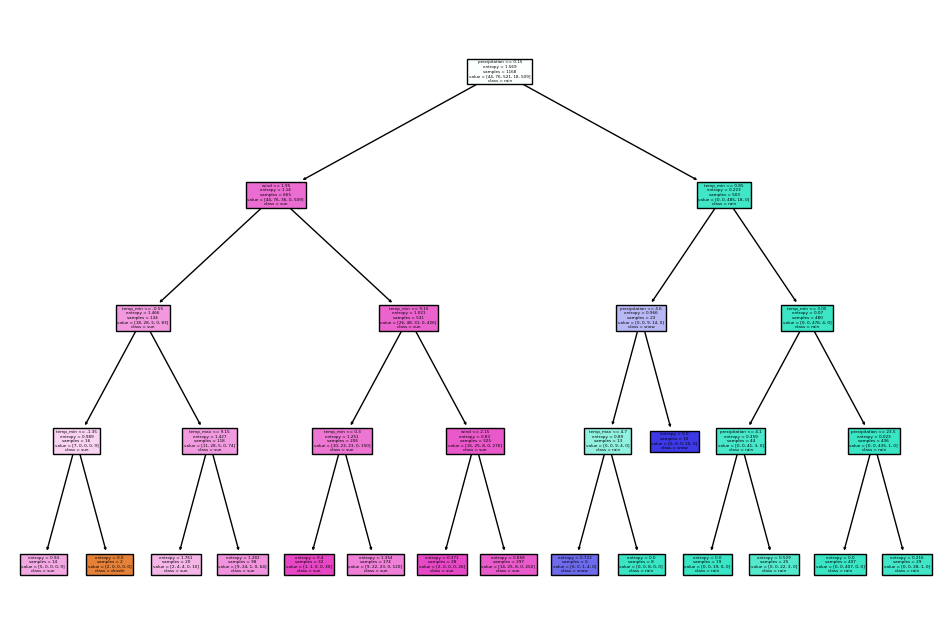

In [60]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dec_tree, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [61]:
df3= pd.read_csv("/content/train.csv")

In [62]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
df3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df3['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
new_df = df3.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)
new_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [67]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Embarked'] = lb.fit_transform(new_df['Embarked'])
lb2 = LabelEncoder()
new_df['Sex'] = lb2.fit_transform(new_df['Sex'])
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [68]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [69]:
print(np.mean(new_df['Age']))

29.69911764705882


In [70]:
new_df['Age'] = new_df['Age'].fillna(np.mean(new_df['Age']))

In [71]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [72]:
x = new_df.drop(['Survived'],axis = 1)
y = new_df['Survived']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [74]:
clf = KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [75]:
y_pred = clf.predict(x_test)

In [76]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [77]:
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       105
           1       0.74      0.57      0.64        74

    accuracy                           0.74       179
   macro avg       0.74      0.71      0.72       179
weighted avg       0.74      0.74      0.73       179



In [78]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()

parameters = {
    'n_neighbors': [x for x in range(1,15,10)],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [79]:
best_model

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [80]:
clf = BernoulliNB(alpha=0.1)

In [81]:
clf.fit(x_train,y_train)

BernoulliNB(alpha=0.1)

In [82]:
pred = clf.predict(x_test)

In [83]:
cm = confusion_matrix(y_test,pred)
cr = classification_report(y_test,pred)

In [84]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



after best model it reduces from 0.82 to 0.78

In [85]:
bnb_clf = BernoulliNB()

bnb_parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

bnb_grid_search1 = GridSearchCV(bnb_clf, bnb_parameters, n_jobs=-1)
bnb_grid_search1.fit(x_train, y_train)

best_bnb_model1 = bnb_grid_search1.best_estimator_



bnb_accuracy1 = best_bnb_model1.score(x_test, y_test)


print("BernoulliNB Accuracy:", bnb_accuracy1)

BernoulliNB Accuracy: 0.7821229050279329


In [86]:
best_bnb_model1

BernoulliNB(alpha=0.1)

In [87]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.81      0.62      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.78      0.78       179



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [88]:
parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']

}
svm_grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
760 fits failed out of a total of 1520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pena

In [89]:
best_svm_model

LinearSVC(C=1.35, max_iter=4000, random_state=42)

In [90]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.35, max_iter=4000, random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [144]:
best_mod= LinearSVC(C=1.5, random_state=42)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_mod, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores: [0.68637993 0.81944444 0.72837293 0.71537427 0.71851188]
Mean score: 0.73361668988142


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [91]:
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=1)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1)

In [92]:
y_pred = dec_tree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 36
Accuracy: 0.80


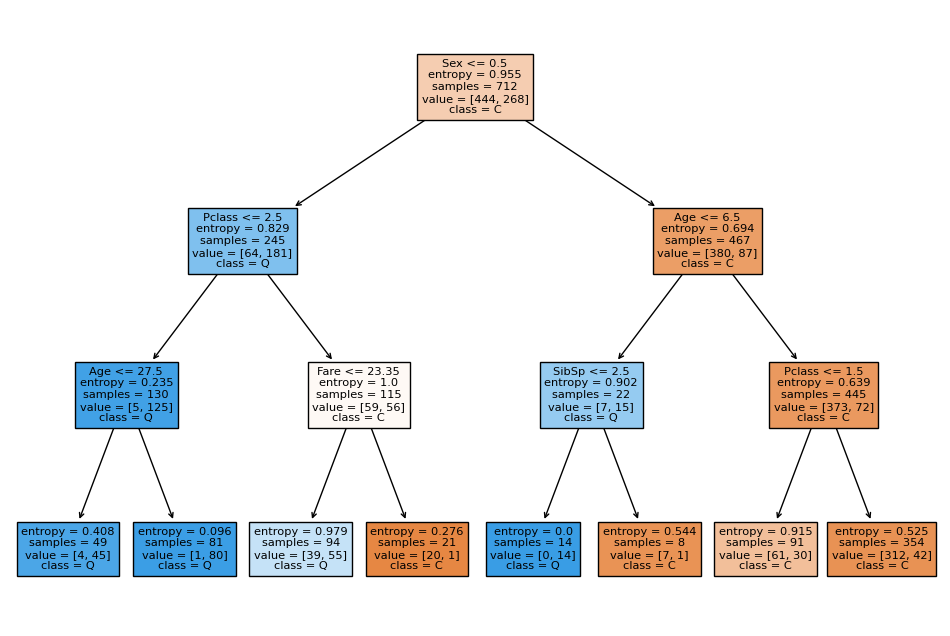

In [93]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dec_tree, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [94]:
param_grid = {
    'max_depth':  [x for x in range(1,11)],
    'min_samples_split':  [x for x in range(2,11)],
    'min_samples_leaf':  [x for x in range(1,11)],
}

dec_tree = tree.DecisionTreeClassifier()


grid_search = GridSearchCV(dec_tree, param_grid, cv=5)


grid_search.fit(x_train, y_train)
best_dt_model= grid_search.best_estimator_

In [95]:
best_dt_model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [96]:
df4=pd.read_csv("/content/bank.csv")

In [97]:
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [98]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [99]:
df4.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [100]:
df4.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [101]:
df4.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [102]:
categorical = [var for var in df4.columns if df4[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [103]:
for var in categorical:
    print("\nValue counts for variable '{}':".format(var))
    print(df4[var].value_counts())


Value counts for variable 'job':
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Value counts for variable 'marital':
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Value counts for variable 'education':
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Value counts for variable 'default':
no     10994
yes      168
Name: default, dtype: int64

Value counts for variable 'housing':
no     5881
yes    5281
Name: housing, dtype: int64

Value counts for variable 'loan':
no     9702
yes    1460
Name: loan, dtype: int64

Value counts for variable 'contact':
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Value counts for variable 'month

In [104]:
for column in df4.columns:
    print(column,df4[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [105]:
categorical_features=[feature for feature in df4.columns if ((df4[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [106]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df4[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


In [107]:
numerical_features = [feature for feature in df4.columns if ((df4[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables

df4[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


<ipython-input-109-d4a303a4a730>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(),annot=True)


<Axes: >

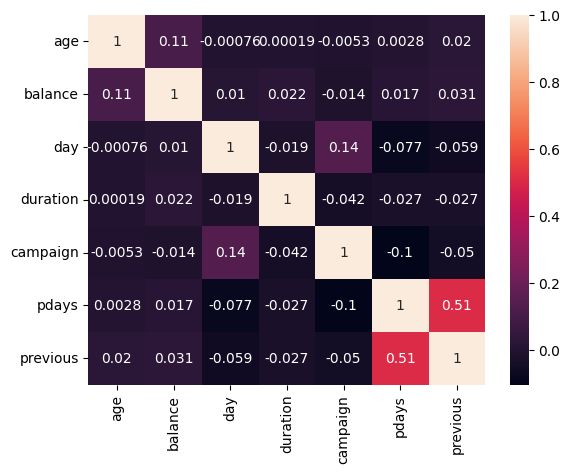

In [109]:
import seaborn as sns
sns.heatmap(df4.corr(),annot=True)

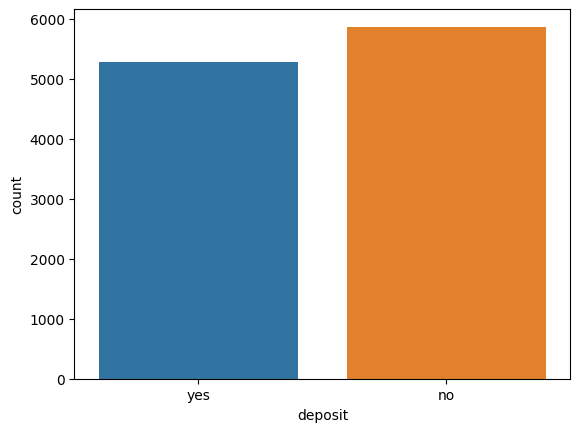

In [111]:
sns.countplot(x='deposit',data=df4)
plt.show()

In [110]:
df5=df4.copy()

In [113]:
df5.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [112]:
df5.drop(['default'],axis=1, inplace=True)

In [115]:
df5.drop(['pdays'],axis=1, inplace=True)

In [114]:
df5.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4940
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [116]:
df6 = df5[df5['previous'] < 31]

In [117]:
feature_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  feature_cols:
    df6 = pd.concat([df6.drop(col, axis=1),pd.get_dummies(df6[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [118]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df6[col+'_new']=df6[col].apply(lambda x : 1 if x == 'yes' else 0)
    df6.drop(col, axis=1, inplace=True)

In [119]:
df6.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [120]:
x = df6.drop(['deposit_new'],axis=1)
y = df6['deposit_new']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8925, 40)
(8925,)
(2232, 40)
(2232,)


In [121]:
clf = KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [122]:
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [123]:
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1153
           1       0.73      0.71      0.72      1079

    accuracy                           0.73      2232
   macro avg       0.73      0.73      0.73      2232
weighted avg       0.73      0.73      0.73      2232



In [124]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()

parameters = {
    'n_neighbors': [x for x in range(1,15,10)],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

In [125]:
best_model

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [126]:
clf = BernoulliNB(alpha=0.1)

In [127]:

clf.fit(x_train,y_train)

BernoulliNB(alpha=0.1)

In [128]:
pred = clf.predict(x_test)

In [129]:
cm1 = confusion_matrix(y_test,pred)
cr1 = classification_report(y_test,pred)

In [130]:
print(cr1)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1153
           1       0.70      0.62      0.66      1079

    accuracy                           0.69      2232
   macro avg       0.69      0.68      0.68      2232
weighted avg       0.69      0.69      0.69      2232



In [131]:
bnb_clf = BernoulliNB()

bnb_parameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

bnb_grid_search1 = GridSearchCV(bnb_clf, bnb_parameters, n_jobs=-1)
bnb_grid_search1.fit(x_train, y_train)

best_bnb_model1 = bnb_grid_search1.best_estimator_



bnb_accuracy1 = best_bnb_model1.score(x_test, y_test)


print("BernoulliNB Accuracy:", bnb_accuracy1)

BernoulliNB Accuracy: 0.6868279569892473


In [132]:
best_bnb_model1

BernoulliNB(alpha=0.1)

In [133]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)


              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1153
           1       0.64      0.73      0.68      1079

    accuracy                           0.67      2232
   macro avg       0.67      0.67      0.67      2232
weighted avg       0.67      0.67      0.67      2232



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [134]:
best_mod= LinearSVC(C=1.3, random_state=42)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(best_mod, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores: [0.68637993 0.81944444 0.72837293 0.62572837 0.71851188]
Mean score: 0.7156875101413931


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [145]:
parameters = {
    'C': [x/100 for x in range(10,200,5)],
    'max_iter': [x for x in range(1000,5000,1000)],
    'penalty': ['l1','l2']

}
svm_grid_search = GridSearchCV(clf, parameters, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

KeyboardInterrupt: ignored

In [148]:
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6, min_samples_split=7, random_state=1)
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=7, random_state=1)

In [149]:
y_pred = dec_tree.predict(x_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 374
Accuracy: 0.83


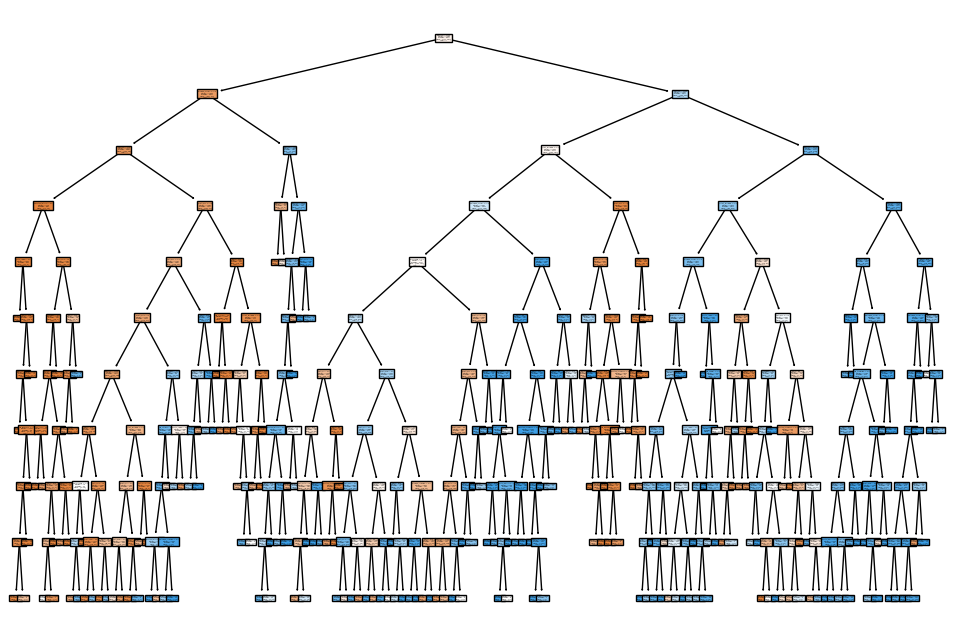

In [150]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dec_tree, feature_names=x.columns, class_names= [str(x) for x in list(lb.classes_)], filled=True)
plt.show()

In [139]:
param_grid = {
    'max_depth':  [x for x in range(1,11)],
    'min_samples_split':  [x for x in range(2,11)],
    'min_samples_leaf':  [x for x in range(1,11)],
}

dec_tree = tree.DecisionTreeClassifier()


grid_search = GridSearchCV(dec_tree, param_grid, cv=5)


grid_search.fit(x_train, y_train)
best_dt_model= grid_search.best_estimator_

In [140]:
best_dt_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=7)